In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.utils import plot_model

In [5]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\LENIN\\Downloads\\Accident-Detection-System-main\\data\\train',
    seed=42,
    image_size= (250, 250),
    batch_size=100,
    color_mode='rgb'
)

Found 791 files belonging to 2 classes.


In [7]:
validation_data =  tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\LENIN\\Downloads\\Accident-Detection-System-main\\data\\val',
    seed=42,
    image_size= (250, 250),
    batch_size=100,
    color_mode='rgb'
)

Found 98 files belonging to 2 classes.


In [10]:
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\LENIN\\Downloads\\Accident-Detection-System-main\\data\\test',
    seed=42,
    image_size= (250, 250),
    batch_size=100,
    color_mode='rgb'
)

Found 100 files belonging to 2 classes.


In [11]:
class_names = training_data.class_names
class_names

['Accident', 'Non Accident']

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'), # Conv2D(f_size, filter_size, activation) # relu, sigmoid, softmax
  layers.MaxPooling2D(), # MaxPooling
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.build((None, 250, 250, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 250, 250, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                        

In [15]:
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(training_data, validation_data=validation_data, epochs = 20, callbacks=callbacks_list)

Epoch 1/20


8/8 [==============================] - ETA: 0s - loss: 1.8815 - accuracy: 0.5588
Epoch 1: val_accuracy improved from -inf to 0.46939, saving model to model_weights.h5


C:\Users\LENIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 40s 4s/step - loss: 1.8815 - accuracy: 0.5588 - val_loss: 1.0942 - val_accuracy: 0.4694
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.6654 - accuracy: 0.6094
Epoch 2: val_accuracy improved from 0.46939 to 0.47959, saving model to model_weights.h5
8/8 [==============================] - 33s 4s/step - loss: 0.6654 - accuracy: 0.6094 - val_loss: 0.7255 - val_accuracy: 0.4796
Epoch 3/20
8/8 [==============================] - ETA: 0s - loss: 0.6033 - accuracy: 0.6625
Epoch 3: val_accuracy improved from 0.47959 to 0.57143, saving model to model_weights.h5
8/8 [==============================] - 44s 6s/step - loss: 0.6033 - accuracy: 0.6625 - val_loss: 0.7098 - val_accuracy: 0.5714
Epoch 4/20
8/8 [==============================] - ETA: 0s - loss: 0.5331 - accuracy: 0.7573
Epoch 4: val_accuracy improved from 0.57143 to 0.64286, saving model to model_weights.h5
8/8 [==============================] - 63s 8s/step - loss: 0.5331 - accuracy

In [16]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [17]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

In [18]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

4/4 [==============================] - 1s 247ms/step


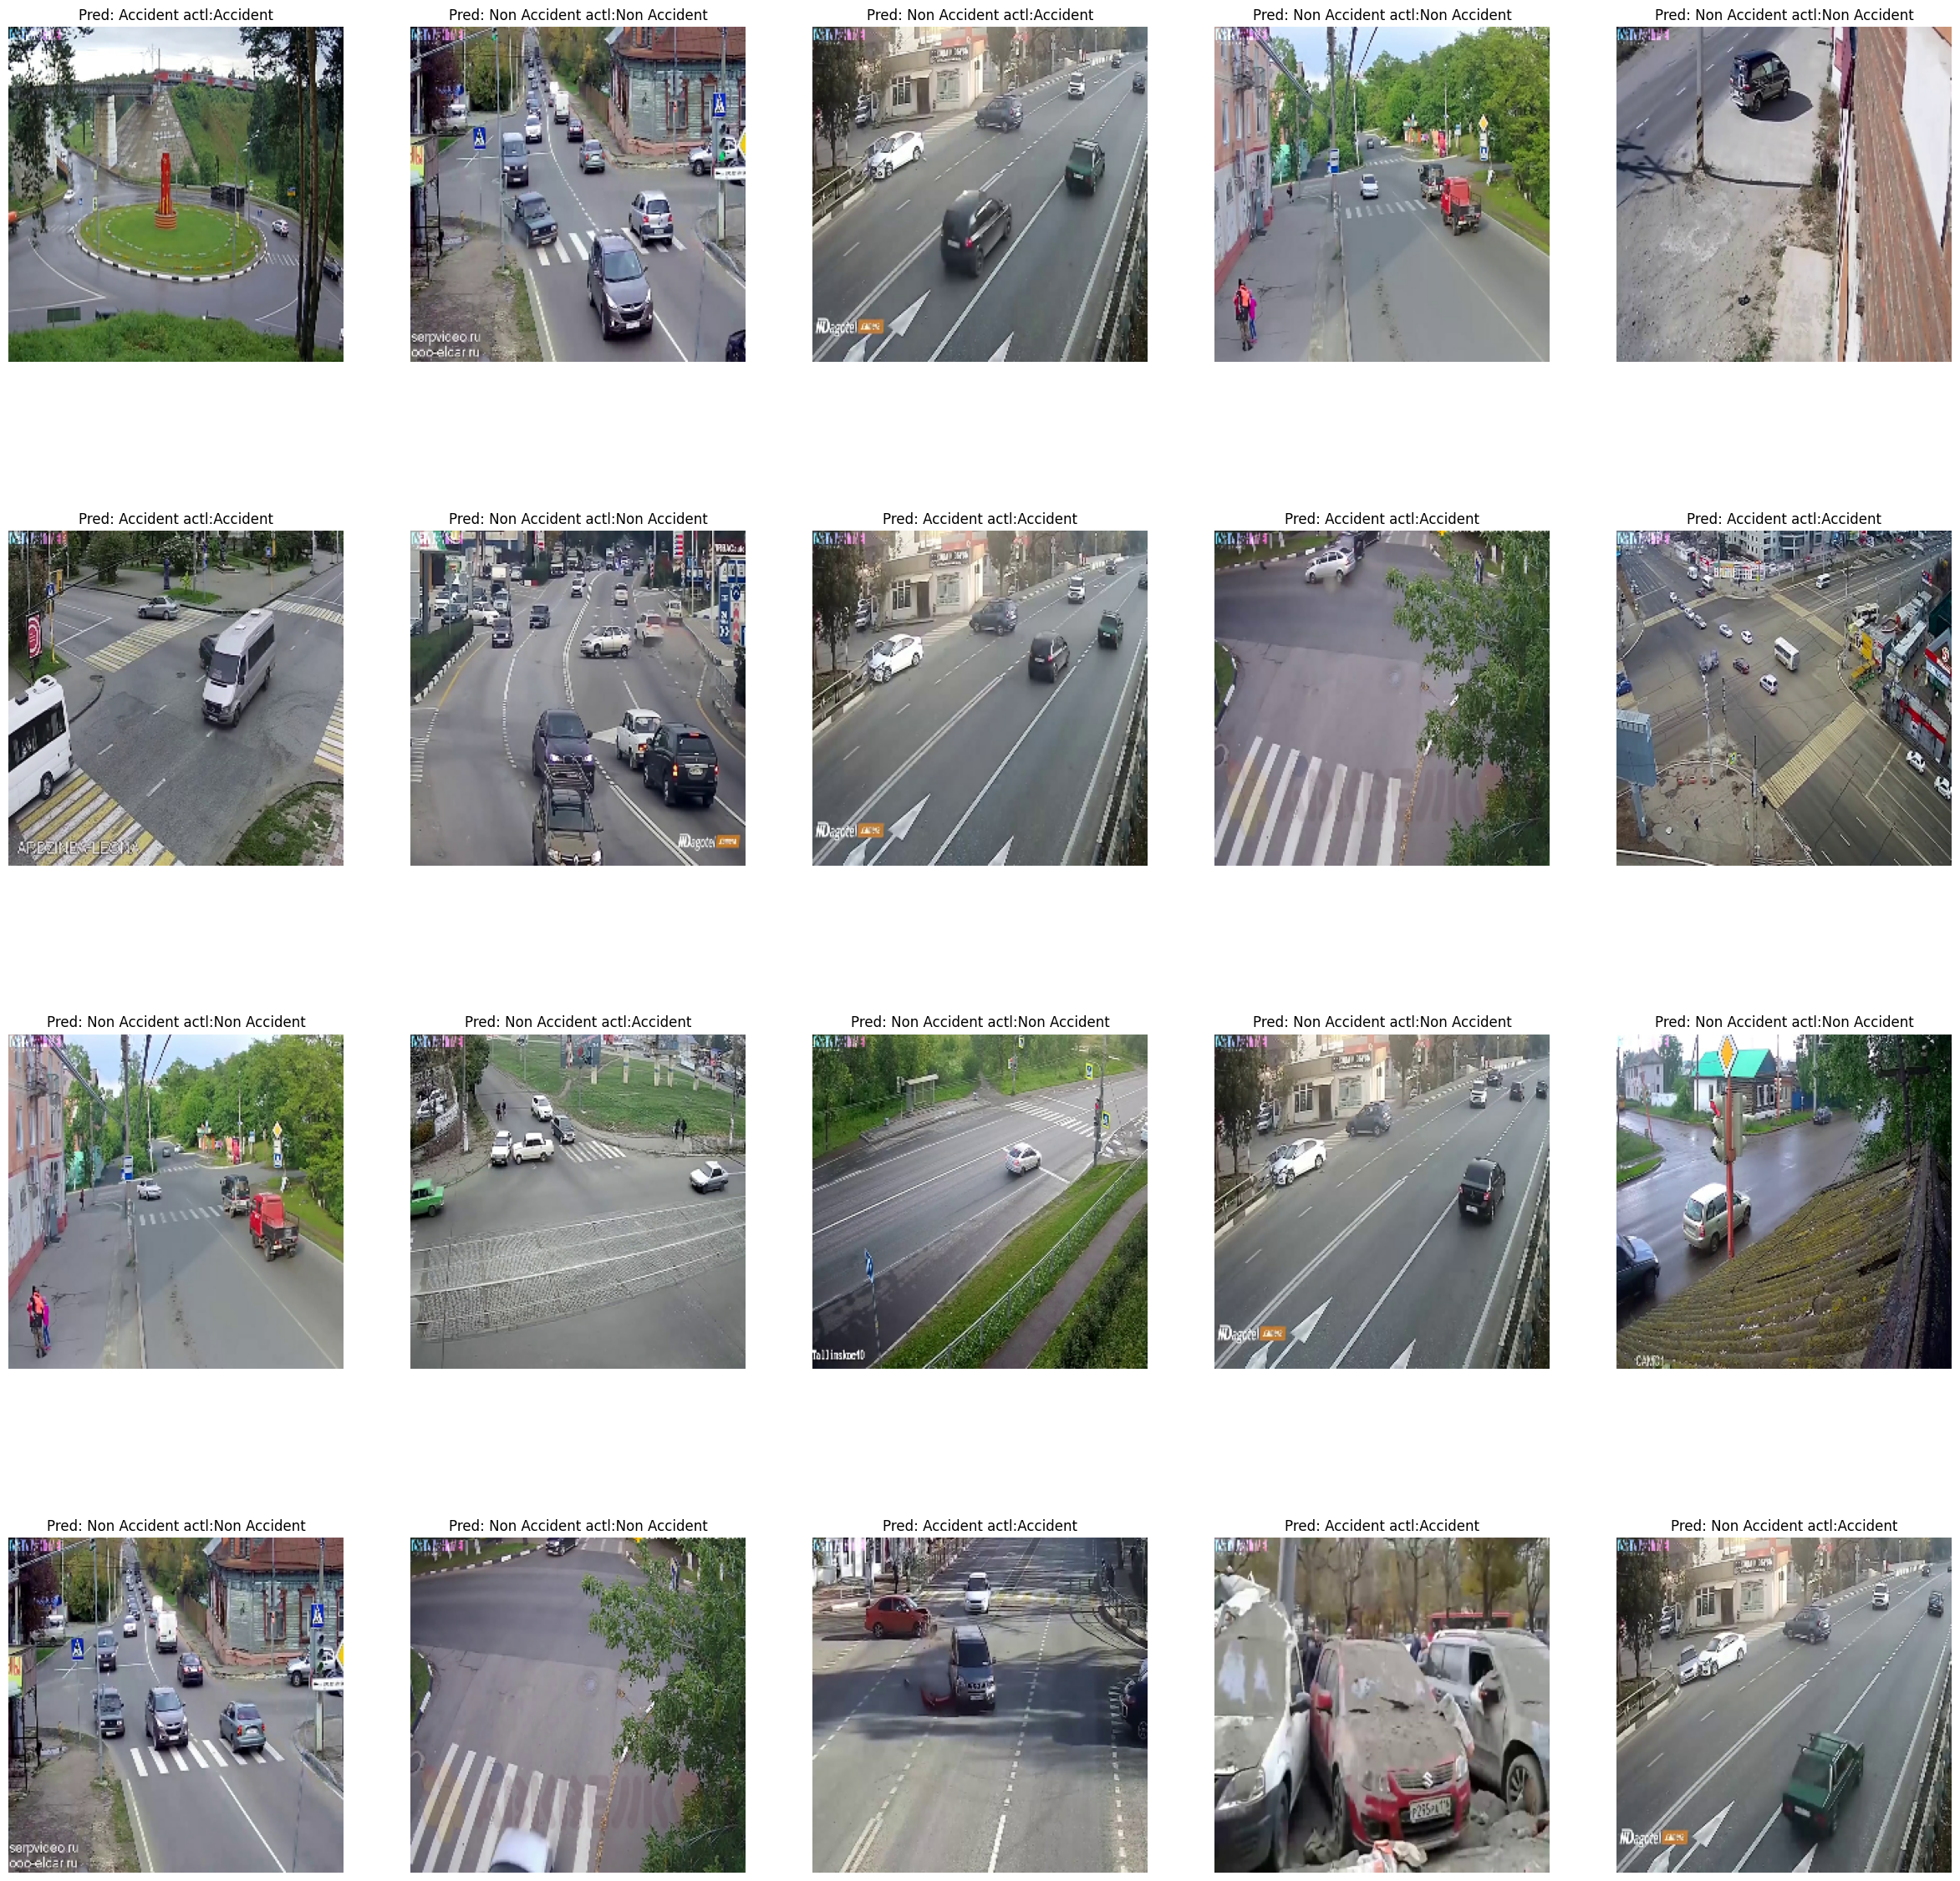

In [25]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)